In [6]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets


def wordToVec(word):
    chars = list(word.upper())
    numbers = list(map(lambda x: ord(x)-65, chars))
    wordMatrix = np.zeros((27,len(numbers)))
    for i, v in enumerate(numbers):
        if ((v < 26) and (v >- 1)):
            wordMatrix[v+1][i] = 1
        if (v == -33):
            wordMatrix[0][i] = 1    
    return wordMatrix.reshape((27*len(numbers)))


def vecToWord(vec):
    wordLen = vec.shape[0]/27
    matrix = vec.reshape(27, wordLen)
    print matrix
    numbers = np.argmax(matrix, axis=0)
    numbers = list(map(lambda x: -32 if x == 0 else x, numbers))
    word = list(map(lambda x: chr(x + 64), numbers))
    return "".join(word)


iris = datasets.load_iris()
x_vals = np.array([x[0:3] for x in iris.data])
y_vals = np.array([x[3] for x in iris.data])
sess = tf.Session()


import pandas as pd
data = pd.read_csv("datamerge.csv")

def pandasStringSeriesToNumpy(col, size):
    addressData = np.zeros((col.shape[0], 27 * size))
    for i, row in data.iterrows():
       if ((i % 1000) == 0):
            print i
       word =  row['addr_street'] 
       padSize = size - len(word)
       word =  word + " " * padSize
       #print word
       addressData[i,:] = wordToVec(word)
    return addressData

addressData = pandasStringSeriesToNumpy(data.addr_street, 31)



addressData = np.float32(addressData)
print addressData.shape

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
(9119, 837)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in divide


Generation: 10. Loss = 32.53374
Generation: 20. Loss = 24.726389
Generation: 30. Loss = 19.120895
Generation: 40. Loss = 17.316727
Generation: 50. Loss = 15.9243145
Generation: 60. Loss = 13.004869
Generation: 70. Loss = 11.792622
Generation: 80. Loss = 10.8107605
Generation: 90. Loss = 9.523663
Generation: 100. Loss = 8.657839
Generation: 110. Loss = 8.324553
Generation: 120. Loss = 8.502621
Generation: 130. Loss = 7.250272
Generation: 140. Loss = 7.8133397
Generation: 150. Loss = 6.771147
Generation: 160. Loss = 6.431509
Generation: 170. Loss = 6.4436703
Generation: 180. Loss = 5.9595428
Generation: 190. Loss = 5.919869
Generation: 200. Loss = 6.279026
Generation: 210. Loss = 5.175519
Generation: 220. Loss = 5.431655
Generation: 230. Loss = 4.593539
Generation: 240. Loss = 5.0293846
Generation: 250. Loss = 4.864963
Generation: 260. Loss = 5.2857957
Generation: 270. Loss = 4.6422024
Generation: 280. Loss = 3.875759
Generation: 290. Loss = 3.676228
Generation: 300. Loss = 4.583323
Gene

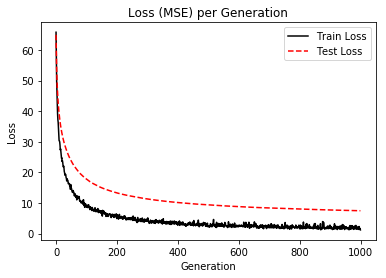

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import pandas as pd
data = pd.read_csv("datamerge.csv")



x_vals = addressData[:,0:31*27]
y_vals = addressData[:,0:31*27]
sess = tf.Session()

 
seed = 42 
tf.set_random_seed(seed)
np.random.seed(seed)

train_indices = np.random.choice(len(x_vals),int( round(len(x_vals)*0.8)), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

# CONFIG NETWORK
INPUT_SIZE = 31*27
OUTPUT_SIZE = 31*27
hidden_layer_nodes = 31*27

 
 
batch_size = 200
x_data = tf.placeholder(shape=[None, INPUT_SIZE], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, OUTPUT_SIZE], dtype=tf.float32)

A1 = tf.Variable(tf.random_normal(shape=[INPUT_SIZE,hidden_layer_nodes]))
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes, OUTPUT_SIZE]))
b2 = tf.Variable(tf.random_normal(shape=[OUTPUT_SIZE]))

hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output, A2),b2))

loss = tf.reduce_mean(tf.square(y_target - final_output))

my_opt = tf.train.GradientDescentOptimizer(0.005)
train_step = my_opt.minimize(loss)
init = tf.initialize_all_variables()
 
    
sess.run(init)
# First we initialize the loss vectors for storage.
loss_vec = []
test_loss = []
for i in range(1000):
    # First we select a random set of indices for the batch.
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    # We then select the training values
    rand_x = x_vals_train[rand_index]
    rand_y = y_vals_train[rand_index]
    
    # Now we run the training step
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    # We save the training loss
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(np.sqrt(temp_loss))

    # Finally, we run the test-set loss and save it.
    test_temp_loss = sess.run(loss, feed_dict={x_data: x_vals_test, y_target: y_vals_test})
    test_loss.append(np.sqrt(test_temp_loss))
    if (i+1)%10==0:
        print('Generation: ' + str(i+1) + '. Loss = ' + str(np.sqrt(temp_loss)))

plt.plot(loss_vec, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()        
        
sess.close()